# SVD (Descomposición en Valores Singulares)

Vamos a descomponer un matriz en sus valores en sus factores singulares
$$\underset{n \times m}{A} = \underset{n \times n}{U} \underset{n \times m}{\Sigma} \underset{m \times m}{V^T}$$

## Compresion de fotografias

from 

In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
fotos=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.linalg import svd

In [5]:
svd?

Signature:
svd(
    a,
    full_matrices=True,
    compute_uv=True,
    overwrite_a=False,
    check_finite=True,
    lapack_driver='gesdd',
)
Docstring:
Singular Value Decomposition.

Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
a 1-D array ``s`` of singular values (real, non-negative) such that
``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
main diagonal ``s``.

Parameters
----------
a : (M, N) array_like
    Matrix to decompose.
full_matrices : bool, optional
    If True (default), `U` and `Vh` are of shape ``(M, M)``, ``(N, N)``.
    If False, the shapes are ``(M, K)`` and ``(K, N)``, where
    ``K = min(M, N)``.
compute_uv : bool, optional
    Whether to compute also ``U`` and ``Vh`` in addition to ``s``.
    Default is True.
overwrite_a : bool, optional
    Whether to overwrite `a`; may improve performance.
    Default is False.
check_finite : bool, optional
    Whether to check that the input matrix contains only finite nu

In [6]:
U, S, V = svd(fotos.images[0],full_matrices=True)

In [8]:
fotos.images[0].shape

(87, 65)

In [9]:
U.shape , S.shape, V.shape

((87, 87), (65,), (65, 65))

In [10]:
S

array([1.0847687e+04, 1.4955084e+03, 9.6743732e+02, 8.9470581e+02,
       5.1685712e+02, 4.3005511e+02, 3.9629172e+02, 3.1856342e+02,
       2.8858957e+02, 2.3616928e+02, 2.2071184e+02, 1.8501259e+02,
       1.5145267e+02, 1.4108414e+02, 1.2933318e+02, 1.1411050e+02,
       1.0061184e+02, 8.6391838e+01, 7.7813423e+01, 6.6432526e+01,
       6.6227333e+01, 5.8732868e+01, 5.1667480e+01, 4.2141304e+01,
       3.9755100e+01, 3.4906044e+01, 3.2347561e+01, 2.7537565e+01,
       2.6124039e+01, 2.4210009e+01, 2.1749500e+01, 2.0842150e+01,
       1.9034710e+01, 1.8094473e+01, 1.6518177e+01, 1.6182966e+01,
       1.4215965e+01, 1.3405646e+01, 1.1358108e+01, 1.0633643e+01,
       9.7773380e+00, 9.2452831e+00, 8.3105383e+00, 7.9601650e+00,
       7.5978570e+00, 6.4621663e+00, 6.1589656e+00, 5.7528305e+00,
       5.1459365e+00, 4.6081204e+00, 4.5291505e+00, 3.7885165e+00,
       3.5829806e+00, 3.4951761e+00, 3.0175862e+00, 2.4891863e+00,
       2.3993316e+00, 2.2257643e+00, 2.0011656e+00, 1.7313511e

In [12]:
Sigma=np.zeros((U.shape[0],V.shape[0]))
Sigma[:V.shape[0],:V.shape[0]]=np.diag(S)

In [13]:
Sigma

array([[10847.68652344,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,  1495.50842285,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,   967.43731689, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [14]:
U @ Sigma @ V

array([[ 57.00024573,  60.33346487,  78.00047711, ...,  40.66696319,
         36.66713076,  34.00043662],
       [ 52.66682278,  60.00035664,  92.00063114, ...,  46.66706083,
         36.00029487,  30.00019982],
       [ 46.00016026,  66.00021451, 113.33320227, ...,  51.00017761,
         43.33352897,  37.66688413],
       ...,
       [ 61.00004236,  62.66693075,  62.33346194, ...,  19.00005339,
         18.33337343,  18.66683295],
       [ 62.66674741,  64.66687496,  67.00002338, ...,  17.33347437,
         18.00013983,  22.33342853],
       [ 65.33341511,  68.00005166,  67.00004318, ...,  17.33348497,
         16.66678818,  22.66664418]])

In [15]:
## Sistemas de Recomendación

In [3]:
df=pd.read_csv("./ratings.csv")

In [4]:
df

,usuario,pelicula,rating
0,1,1193,5
1,1,2355,5
2,1,1197,3
3,1,2804,5
4,1,919,4
...,...,...,...
183137,6040,2791,4
183138,6040,527,5
183139,6040,541,4
183140,6040,2028,5


In [5]:
df.pivot_table(values="rating",index="usuario",columns="pelicula")

pelicula,1,21,32,34,39,50,110,223,260,296,...,2959,2987,2997,3114,3175,3418,3471,3481,3578,3793
usuario,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,5.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,4.0,3.0,5.0,NaN,NaN,NaN,4.0,...,4.0,4.0,5.0,NaN,NaN,3.0,NaN,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,3.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,NaN,...,NaN,2.0,4.0,4.0,4.0,4.0,5.0,3.0,NaN,NaN
6037,NaN,NaN,3.0,3.0,NaN,4.0,NaN,NaN,5.0,5.0,...,NaN,NaN,4.0,4.0,4.0,NaN,5.0,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.pivot_table(values="rating",index="usuario",columns="pelicula").isnull().sum()

pelicula
1       3958
21      4679
32      4524
34      4284
39      4673
        ... 
3418    4618
3471    4584
3481    4662
3578    4111
3793    4524
Length: 100, dtype: int64

In [9]:
###
DF=df.pivot_table(values="rating",index="usuario",columns="pelicula").fillna(0)

In [10]:
DF

pelicula,1,21,32,34,39,50,110,223,260,296,...,2959,2987,2997,3114,3175,3418,3471,3481,3578,3793
usuario,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,5.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,4.0,...,4.0,4.0,5.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,0.0,...,0.0,2.0,4.0,4.0,4.0,4.0,5.0,3.0,0.0,0.0
6037,0.0,0.0,3.0,3.0,0.0,4.0,0.0,0.0,5.0,5.0,...,0.0,0.0,4.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from scipy.sparse.linalg import svds

In [13]:
valores_singulares=10
U,s,V=svds(DF,k=valores_singulares) ## truncamos con k valores singualres

In [14]:
U.shape,s.shape,V.shape

((6035, 10), (10,), (10, 100))

In [18]:
S = np.zeros((s.shape[0],s.shape[0]))
for i in range(s.shape[0]):
    S[i,i]=s[i]

In [19]:
S

array([[ 176.96156412,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,  180.02431343,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,  190.3846932 ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  206.2091552 ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         216.83497778,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  255.47284689,    0.        ,    0

In [20]:
U @ S @ V

array([[ 2.69741551, -0.42107844, -0.10678392, ..., -0.26837044,
        -0.07062393, -0.03607874],
       [ 0.4586078 ,  1.13121114,  0.60552692, ...,  0.98104388,
         2.44617721,  0.97296977],
       [ 2.11194629,  0.51996779, -0.5966718 , ...,  1.21861787,
         0.69743444,  0.85914404],
       ...,
       [ 0.33656183, -0.04525818, -0.18362975, ..., -0.01014997,
         0.21265078,  0.12903017],
       [ 2.05057021,  0.08789171,  0.2990587 , ...,  0.42525262,
        -0.44681095,  0.11289977],
       [ 2.26959795,  0.96632394,  2.79499327, ...,  1.51207585,
         0.57448459,  0.57109069]])

In [16]:
## Reducción de dataset

In [17]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [19]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [20]:
svd(cancer.data)

(array([[-7.28234229e-02,  1.40182689e-01, -3.12760686e-02, ...,
         -7.07372226e-03, -7.61143555e-02, -6.11817112e-02],
        [-7.70601617e-02,  2.29400982e-02,  2.71029712e-02, ...,
          4.39988617e-02,  3.98298845e-02,  1.18446791e-01],
        [-6.82716145e-02,  4.81672587e-03,  3.45402225e-02, ...,
         -1.46629983e-02, -9.78525568e-02,  2.13899436e-02],
        ...,
        [-4.62714297e-02, -2.21821871e-02, -4.06540119e-03, ...,
          9.76941309e-01, -1.71888786e-03,  8.74956159e-05],
        [-7.24882597e-02,  8.06080853e-03,  3.76641838e-03, ...,
          2.95038414e-03,  8.97036505e-01, -1.63325168e-02],
        [-1.07739958e-02, -2.13564017e-03, -4.44327210e-02, ...,
          3.47719928e-04, -1.20753543e-02,  9.30529421e-01]]),
 array([3.07864446e+04, 2.48044578e+03, 8.80462945e+02, 5.55123288e+02,
        1.53142190e+02, 5.72902829e+01, 3.22542483e+01, 1.45492521e+01,
        9.83274331e+00, 7.07006116e+00, 4.42538572e+00, 2.20566405e+00,
        1.409

In [21]:
from sklearn.decomposition import TruncatedSVD

$$A=U\times S\times U^t$$

In [23]:
print(TruncatedSVD.__doc__)

Dimensionality reduction using truncated SVD (aka LSA).

    This transformer performs linear dimensionality reduction by means of
    truncated singular value decomposition (SVD). Contrary to PCA, this
    estimator does not center the data before computing the singular value
    decomposition. This means it can work with sparse matrices
    efficiently.

    In particular, truncated SVD works on term count/tf-idf matrices as
    returned by the vectorizers in :mod:`sklearn.feature_extraction.text`. In
    that context, it is known as latent semantic analysis (LSA).

    This estimator supports two algorithms: a fast randomized SVD solver, and
    a "naive" algorithm that uses ARPACK as an eigensolver on `X * X.T` or
    `X.T * X`, whichever is more efficient.

    Read more in the :ref:`User Guide <LSA>`.

    Parameters
    ----------
    n_components : int, default=2
        Desired dimensionality of output data.
        Must be strictly less than the number of features.
        Th

In [24]:
svd=TruncatedSVD(n_components=2)
svd.fit(cancer.data)
cancer_svd=svd.transform(cancer.data)

In [25]:
cancer_svd

array([[2241.97427647,  347.71556015],
       [2372.40840267,   56.90166991],
       [2101.8402797 ,   11.94762737],
       ...,
       [1424.53280954,  -55.0217124 ],
       [2231.65579282,   19.99439854],
       [ 331.69302638,   -5.29733966]])

In [27]:
svd.components_

array([[ 1.07417853e-02,  1.34045777e-02,  7.04506088e-02,
         5.72522445e-01,  6.51751678e-05,  8.01017182e-05,
         8.07639302e-05,  4.51934799e-05,  1.22298430e-04,
         4.10463505e-05,  3.52395083e-04,  7.91756415e-04,
         2.49763979e-03,  4.15710660e-02,  4.46726431e-06,
         1.84034785e-05,  2.35606720e-05,  8.71328141e-06,
         1.33301479e-05,  2.50009455e-06,  1.27106222e-02,
         1.78787301e-02,  8.44072509e-02,  8.10936848e-01,
         8.96729192e-05,  1.95800247e-04,  2.25664038e-04,
         9.56995686e-05,  1.97533332e-04,  5.62166955e-05],
       [-3.10857421e-02, -4.83124253e-02, -1.97364828e-01,
        -7.70224130e-01, -2.62097172e-04, -1.75341873e-04,
        -4.07661495e-05, -1.69018436e-05, -4.97684199e-04,
        -1.84499403e-04, -8.41315666e-05, -4.03047670e-03,
        -1.33910533e-03,  6.79661807e-02, -2.42657052e-05,
        -6.56841723e-05, -8.35322707e-05, -3.01365028e-05,
        -7.25209655e-05, -1.16619632e-05, -2.41432752e-

In [28]:
svd.singular_values_

array([30786.44462784,  2480.44578339])

In [29]:
svd.explained_variance_ratio_

array([0.97440781, 0.02168862])

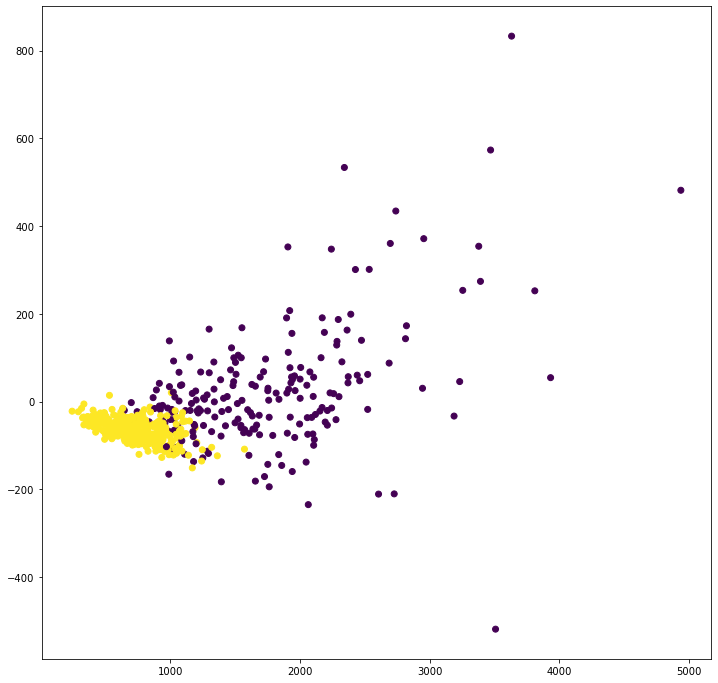

In [31]:
plt.figure(figsize=(12,12))
plt.scatter(cancer_svd[:,0],cancer_svd[:,1],c=cancer.target)

In [21]:
### Ejercicio
pd.read_csv("./retail.csv")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,573744,21314,SMALL GLASS HEART TRINKET POT,8,2011-11-01 08:16:00,2.10,17733.0,United Kingdom
1,573744,21704,BAG 250g SWIRLY MARBLES,12,2011-11-01 08:16:00,0.85,17733.0,United Kingdom
2,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-01 08:16:00,1.25,17733.0,United Kingdom
3,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,2011-11-01 08:16:00,1.25,17733.0,United Kingdom
4,573744,21915,RED HARMONICA IN BOX,12,2011-11-01 08:16:00,1.25,17733.0,United Kingdom
...,...,...,...,...,...,...,...,...
84706,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom
84707,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom
84708,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom
84709,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom


## Crear una matriz CLiente/Producto donde la intersección sea el numero de veces que cada cliente compra un producto

## Hacer la descomposicion SVD para la matriz anterior k=20

## Reconstruir la Matriz Original